In [2]:
import numpy as np
import pandas as pd
from tdc.multi_pred import GDA

# To use the DisGeNET dataset with TDC, you can use the following code:

data = GDA(name='DisGeNET')
split = data.get_split()

Found local copy...
Loading...
Done!


In [3]:
# Visualizar as primeiras linhas do dataset
print(split['train'].head())
print(split['valid'].head())
print(split['test'].head())

# Número de entradas em cada divisão
print(f"Tamanho do treino: {len(split['train'])}")
print(f"Tamanho da validação: {len(split['valid'])}")
print(f"Tamanho do teste: {len(split['test'])}")


   Gene_ID                                               Gene Disease_ID  \
0        1  MSMLVVFLLLWGVTWGPVTEAAIFYETQPSLWAESESLLKPLANVT...   C0019209   
1        1  MSMLVVFLLLWGVTWGPVTEAAIFYETQPSLWAESESLLKPLANVT...   C0036341   
2        2  MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEK...   C0002395   
3        2  MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEK...   C0011265   
4        2  MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEK...   C0019202   

                                             Disease    Y  
0   Hepatomegaly: Abnormal enlargement of the liver.  0.3  
1  Schizophrenia: Schizophrenia is highly heritab...  0.3  
2  Alzheimer's Disease: Alzheimer disease is the ...  0.5  
3  Presenile dementia: The presence of dementia i...  0.3  
4  Hepatolenticular Degeneration: Wilson disease ...  0.3  
   Gene_ID                                               Gene Disease_ID  \
0    10533  MAAATGDPGLSKLQFAPFSSALDVGFWHELTQKKLNEYRLDEAPKD...   C0023380   
1     2322  MPALARDGGQLPLLVVFSA

**Estrutura do Dataset**:

***Gene_ID e Gene***: Representam os genes, sendo que o campo Gene contém sequências de aminoácidos.  

***Disease_ID e Disease***: Identificadores e descrições das doenças.  

***Y***: Valor alvo, representando a força da associação gene-doença.  

**Tamanho das Divisões**:

O conjunto é bem distribuído em treino (**36.733**), validação (**5.248**) e teste (**10.495**), o que é ideal para análise.

### Análise Exploratória

#### Distribuição dos valores de Y (associação gene-doença):

A maioria das associações está concentrada em valores baixos (~0.3), o que pode indicar um viés ou tendência no dataset para associações fracas. Isso será importante para calibrar os modelos preditivos.

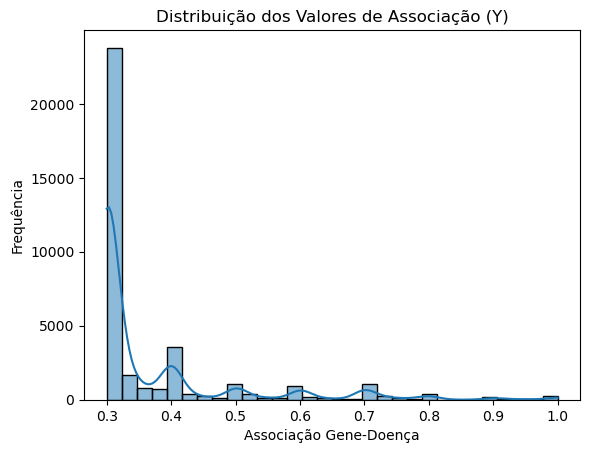

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribuição de Y no conjunto de treino
sns.histplot(split['train']['Y'], bins=30, kde=True)
plt.title('Distribuição dos Valores de Associação (Y)')
plt.xlabel('Associação Gene-Doença')
plt.ylabel('Frequência')
plt.show()



#### Top 10 Genes mais frequentes:
O gene com Gene_ID = 7124 é o mais frequente, aparecendo mais de 160 vezes no conjunto de treino. Esse gene provavelmente desempenha um papel significativo no dataset e deve ser analisado com atenção.

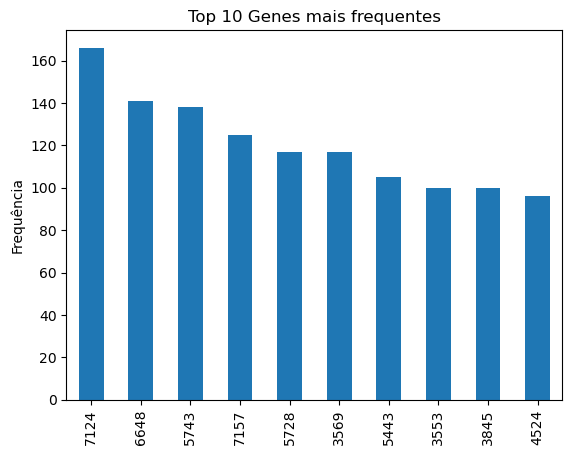

In [ ]:
# Genes mais frequentes
top_genes = split['train']['Gene_ID'].value_counts().head(10)
top_genes.plot(kind='bar')
plt.title('Top 10 Genes mais frequentes')
plt.ylabel('Frequência')
plt.show()


#### Top 10 Doenças mais frequentes:

A doença com Disease_ID = C0006142 (provavelmente uma condição muito estudada) aparece em cerca de 700 associações, indicando que também pode ser um ponto de foco importante.

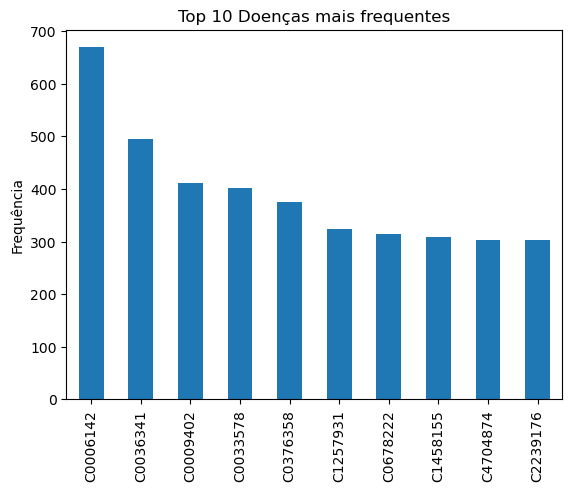

In [8]:
# Doenças mais frequentes
top_diseases = split['train']['Disease_ID'].value_counts().head(10)
top_diseases.plot(kind='bar')
plt.title('Top 10 Doenças mais frequentes')
plt.ylabel('Frequência')
plt.show()